In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
chrom_lengths = {'chr1': 247249719,
                 'chr2': 242951149,
                 'chr3': 199501827,
                 'chr4': 191273063,
                 'chr5': 180857866,
                 'chr6': 170899992,
                 'chr7': 158821424,
                 'chr8': 146274826,
                 'chr9': 140273252,
                 'chr10': 135374737,
                 'chr11': 134452384,
                 'chr12': 132349534,
                 'chr13': 114142980,
                 'chr14': 106368585,
                 'chr15': 100338915,
                 'chr16': 88827254,
                 'chr17': 78774742,
                 'chr18': 76117153,
                 'chr19': 63811651,
                 'chr20': 62435964,
                 'chr21': 46944323,
                 'chr22': 49691432}

In [4]:
endpoints = set([(k, v) for k, v in chrom_lengths.items()] + [(k, 0) for k in chrom_lengths.keys()])

with open('../data/DECODE/DECODE_Recombination_Events_Maternal_01OCT2013.txt', 'r') as f:
    next(f) # skip header
    for line in f:
        pieces = line.strip().split()
        if pieces[0] != 'chrX':
            endpoints.add((pieces[0], int(pieces[1])-1))
            endpoints.add((pieces[0], int(pieces[1])))
            endpoints.add((pieces[0], int(pieces[2])-1))
            endpoints.add((pieces[0], int(pieces[2])))
            
with open('../data/DECODE/DECODE_Recombination_Events_Paternal_01OCT2013.txt', 'r') as f:
    next(f) # skip header
    for line in f:
        pieces = line.strip().split()
        if pieces[0] != 'chrX':
            endpoints.add((pieces[0], int(pieces[1])-1))
            endpoints.add((pieces[0], int(pieces[1])))
            endpoints.add((pieces[0], int(pieces[2])-1))
            endpoints.add((pieces[0], int(pieces[2])))

endpoints = sorted(endpoints)
endpoint_to_index = dict([(x, i) for i, x in enumerate(endpoints)])
print('endpoints', len(endpoints))

endpoints 967883


In [5]:
# endpoints, mat/pat
recomb_prob = np.zeros((len(endpoints), 2))
with open('../data/DECODE/DECODE_Recombination_Events_Maternal_01OCT2013.txt', 'r') as f:
    next(f) # skip header
    for line in f:
        pieces = line.strip().split()
        if pieces[0] != 'chrX':
            start_pos, end_pos = int(pieces[1]), int(pieces[2])
            recomb_prob[endpoint_to_index[(pieces[0], start_pos)]:(endpoint_to_index[(pieces[0], end_pos)]), 0] += 1/(end_pos-start_pos)

with open('../data/DECODE/DECODE_Recombination_Events_Paternal_01OCT2013.txt', 'r') as f:
    next(f) # skip header
    for line in f:
        pieces = line.strip().split()
        if pieces[0] != 'chrX':
            start_pos, end_pos = int(pieces[1]), int(pieces[2])
            recomb_prob[endpoint_to_index[(pieces[0], start_pos)]:(endpoint_to_index[(pieces[0], end_pos)]), 1] += 1/(end_pos-start_pos)

recomb_prob[:, 0] = recomb_prob[:, 0]/41745 # from paper - the number of meioses
recomb_prob[:, 1] = recomb_prob[:, 1]/30184

In [6]:
genome_length = sum(chrom_lengths.values())
print('genome length', genome_length)

genome length 2867732772


In [38]:
current_spot = 0
for i in np.argsort(recomb_prob[:-1, 0]):
    if endpoints[i][0] == endpoints[i+1][0]:
        # not in a chromosome break
        current_spot += (endpoints[i+1][1]-endpoints[i][1])
        if current_spot > genome_length/2:
            print(-np.log10(recomb_prob[i, 0]))
            break
            
current_spot = 0
for i in np.argsort(recomb_prob[:-1, 1]):
    if endpoints[i][0] == endpoints[i+1][0]:
        # not in a chromosome break
        current_spot += (endpoints[i+1][1]-endpoints[i][1])
        if current_spot > genome_length/2:
            print(-np.log10(recomb_prob[i, 1]))
            break

8.219091120540256
8.578163698218093


In [42]:
chrom = 'chr5'
is_in_chrom = np.array([c==chrom for c, p in endpoints])
pos = np.array([p for c, p in endpoints if c==chrom])

In [46]:
print(pos)

[        1   6001979   6001980 ... 241912790 241912791 247249720]


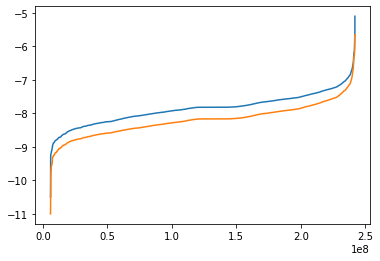

In [73]:
chrom = 'chr1'
is_in_chrom = np.array([c==chrom for c, p in endpoints]) & (np.sum(recomb_prob, axis=1)>0)
pos = np.array([p for i, (c, p) in enumerate(endpoints) if is_in_chrom[i]])

plt.plot(pos, np.log10(np.clip(recomb_prob[is_in_chrom][np.argsort(recomb_prob[is_in_chrom][:, 0]), 0], 10**-11, 1)))
plt.plot(pos, np.log10(np.clip(recomb_prob[is_in_chrom][np.argsort(recomb_prob[is_in_chrom][:, 1]), 1], 10**-11, 1)))

plt.show()

In [10]:
-np.log10(np.median(recomb_prob))

1.512832623158528e-08